# FLIGHT TICKET Dataset Project EDA Report

## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Atharva Kulkarni
Performed By  PRASHANT B. AGHAO
* Solve in ipynb:
1. Import the dataset.
[flight.ipynb]\flight_price_1.csv
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps

## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **FLIGHT TICKET PRICE** from UCI. 

2.1 ObjectivesClearly state the goals of the exploratory data analysis, such as identifying patterns, trends, and anomalies in the flight ticket data.


## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report**

**3. Exploratory Data Analysis (EDA) on all Features**


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
# Create Dataframe and Read the dataset using Pandas
df = pd.read_csv('flight_price_1.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
# Overview of the dataset
print("\nDataset Overview:")
print(df.info())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [6]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


* Looks like all the features are  identified as object but can be converted into numeric, if we remove rows which has strings.

## 3.4 Data Cleaning


In [9]:
# Check Unique values of target variable
df.value_counts()

Airline                  Date_of_Journey  Source    Destination  Route                  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info              Price
Jet Airways              27/05/2019       Delhi     Cochin       DEL → AMD → BOM → COK  19:10     19:00 28 May  23h 50m   2 stops      No info                      15129    3
                         18/05/2019       Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 19 May  22h 55m   2 stops      In-flight meal not included  13029    3
Air India                24/06/2019       Delhi     Cochin       DEL → GOI → BOM → COK  22:00     19:15 25 Jun  21h 15m   2 stops      No info                      9181     3
Jet Airways              9/05/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 10 May  22h 55m   2 stops      In-flight meal not included  13029    3
                         1/06/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 02 Jun  22h 55m   2 stops 

### 3.5 Exploratory Data Analysis (EDA)

PLOT OF DISTRIBUTION OF FLIGHT

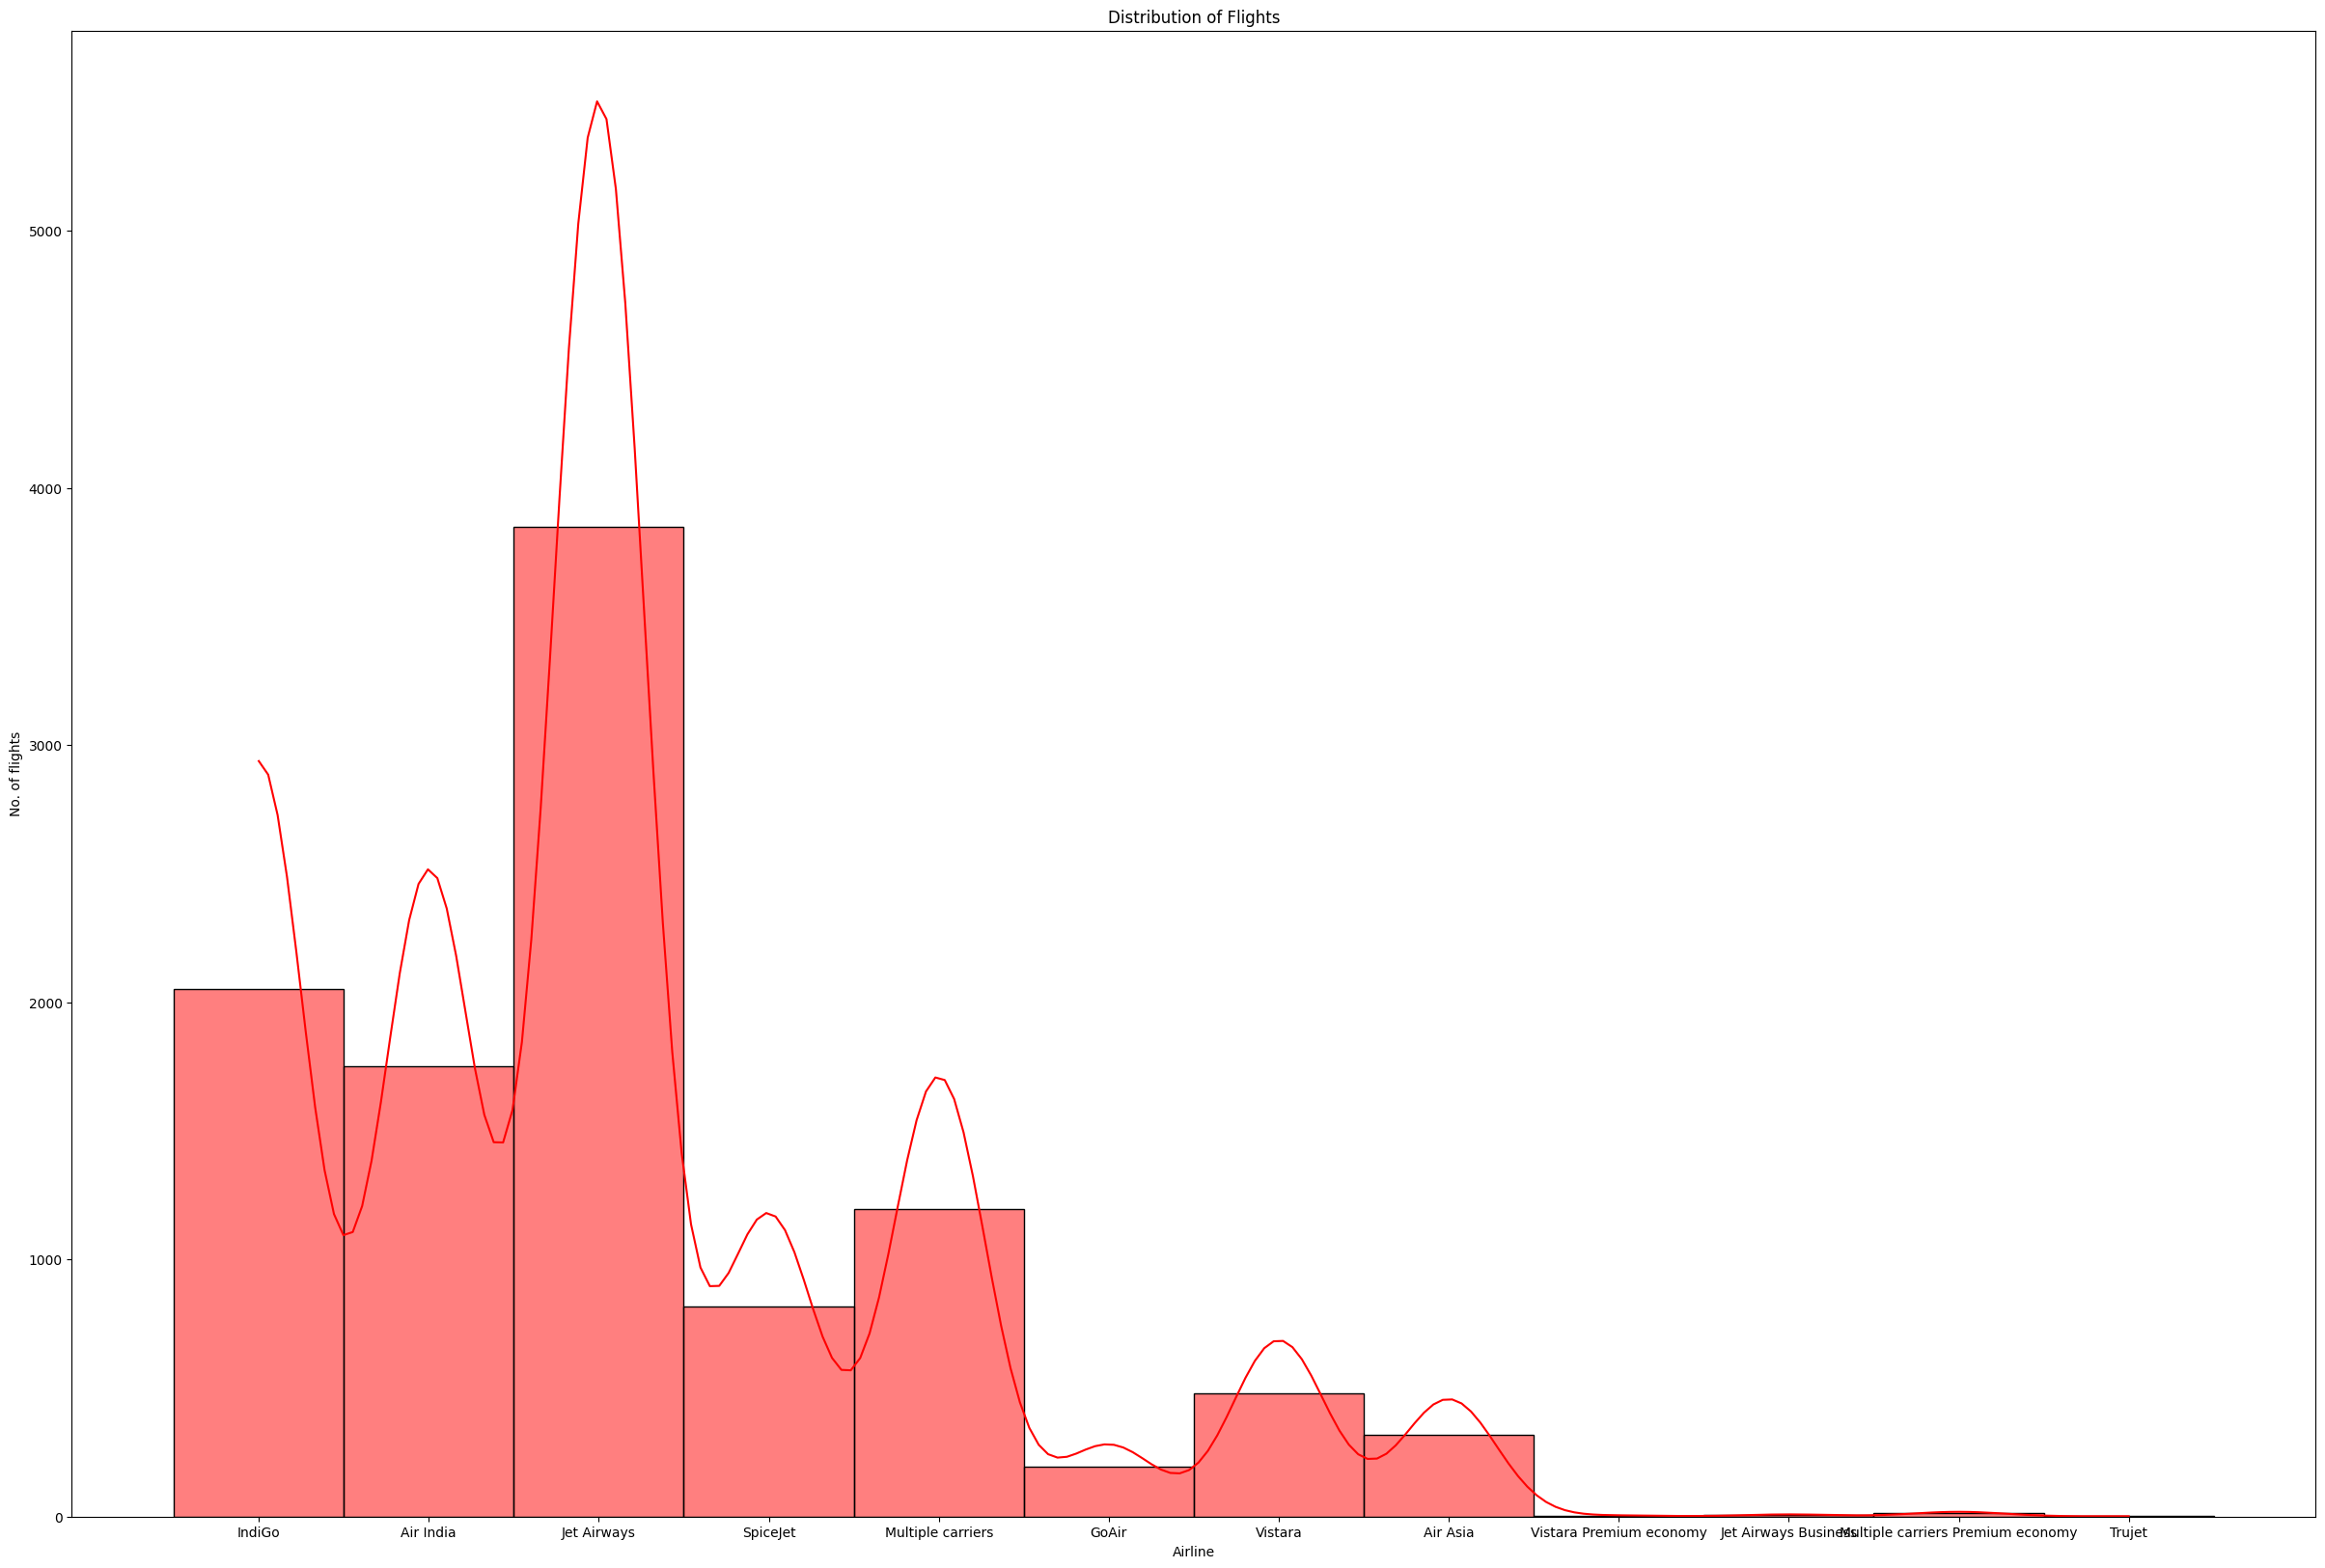

In [10]:
# Plot the distribution of ticket prices
plt.figure(figsize=(30, 20))
sns.histplot(df['Airline'], bins=30, kde=True, color='r')
plt.title('Distribution of Flights')
plt.xlabel('Airline')
plt.ylabel('No. of flights')
plt.show()


GRAPH SHOWING NO OF STOPS

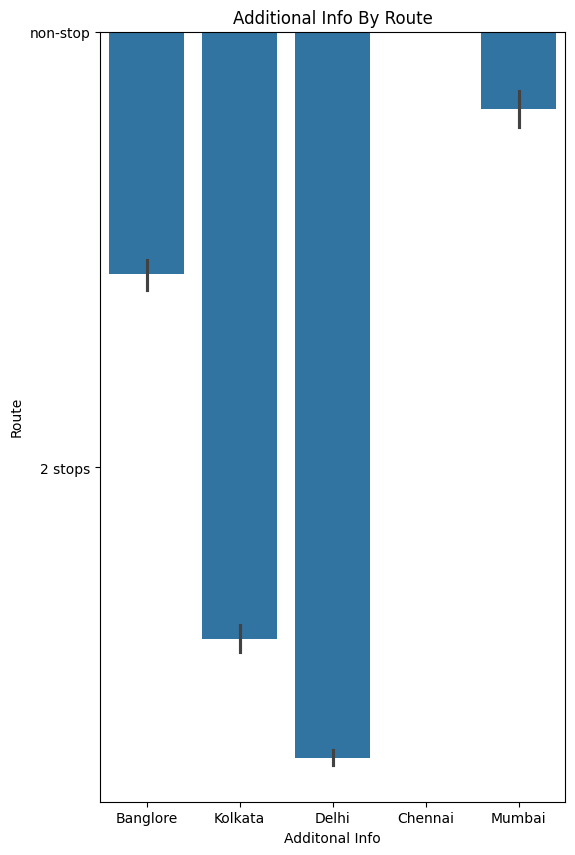

In [53]:
plt.figure(figsize=(6, 10))
sns.barplot(x='Source', y='Total_Stops', data=df)
plt.title('Additional Info By Route')
plt.xlabel('Additonal Info')
plt.ylabel('Route')
plt.show()


TICKET PRIZES BY AIRLINE

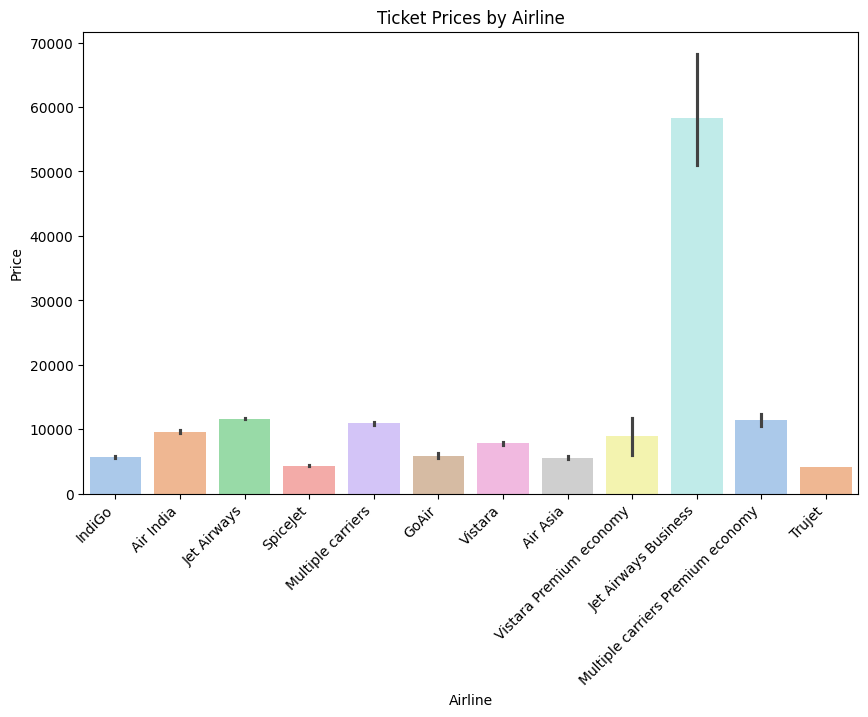

In [76]:
# Price analysis: box plot of ticket prices by airline
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Price', data=df, palette='pastel')
plt.title('Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()


* AS PER DATA JET AIRWAYS BUSINESS HAVE HIGHEST TICKET PRIZES
* SPICEJET HAVE LOWEST TICKET PRIZES

PRIZES BY LOCATION

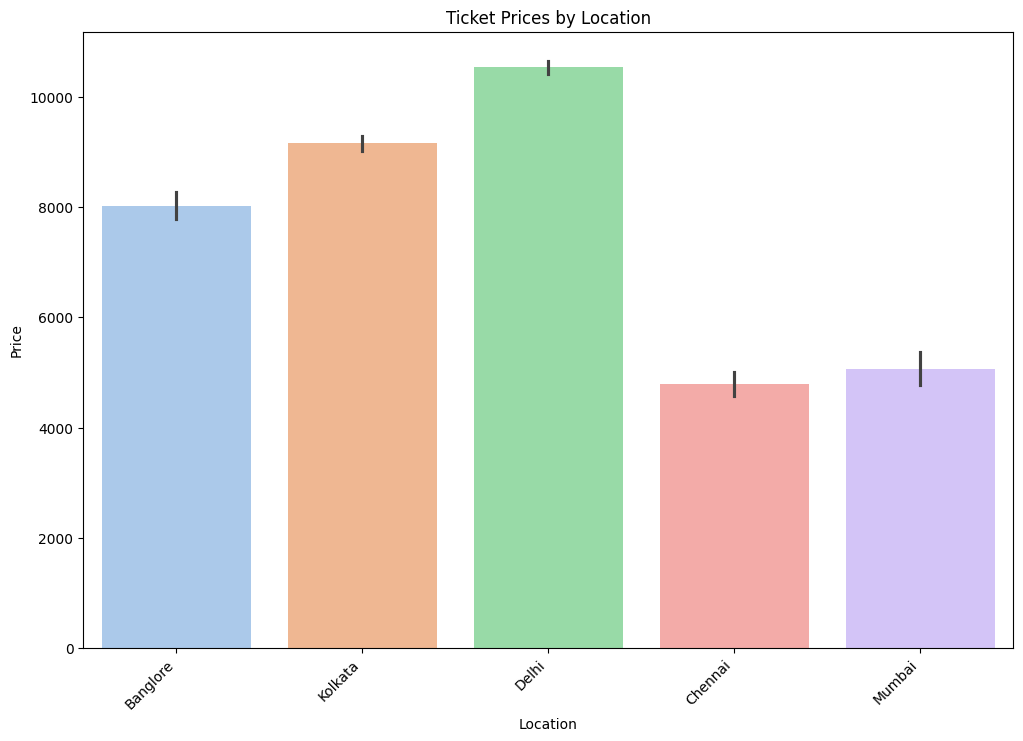

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Source', y='Price', data=df, palette='pastel')
plt.title('Ticket Prices by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()


NO OF FLIGHT AS PER ROUTES

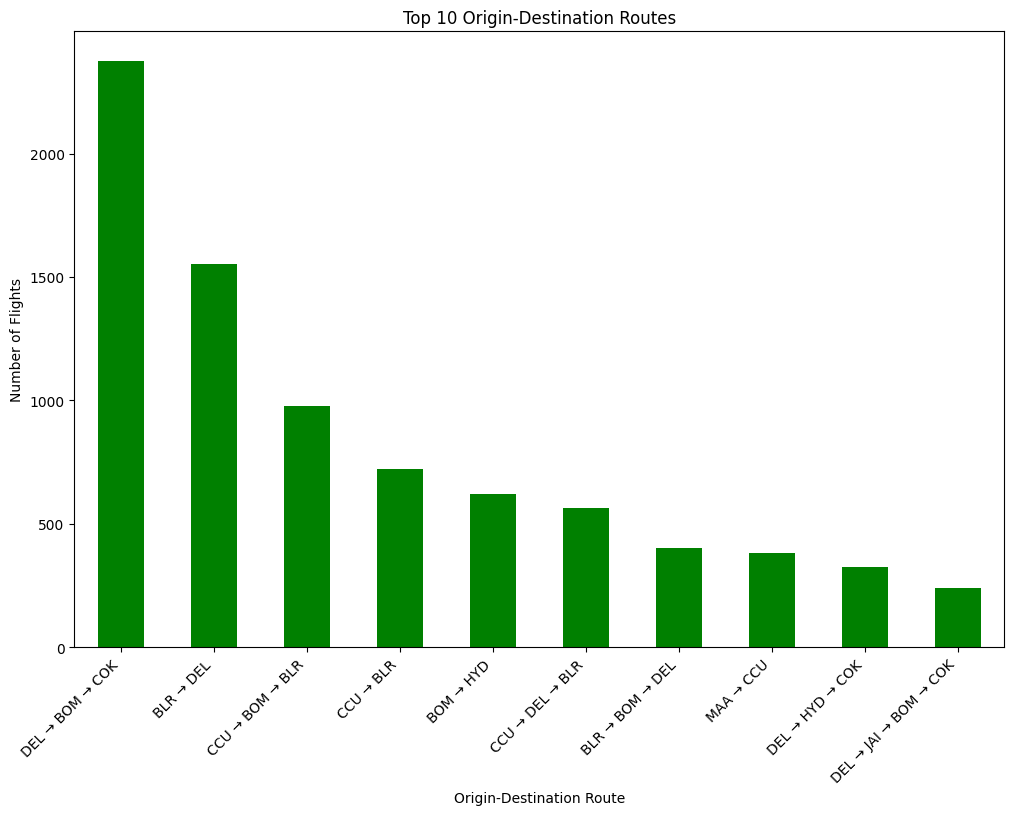

In [74]:
# Geographic analysis: plot a bar chart of top origin-destination pairs
top_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_routes.plot(kind='bar', color='g')
plt.title('Top 10 Origin-Destination Routes')
plt.xlabel('Origin-Destination Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()



CHART OF AIRLINES DISTRIBUTION

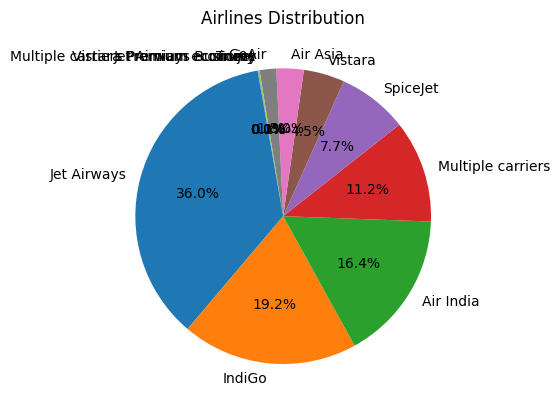

In [88]:
# Perform EDA and create a pie chart
airline_counts = df['Airline'].value_counts()
labels = airline_counts.index
sizes = airline_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100)
plt.title('Airlines Distribution')
plt.show()

### REPORT

* JET AIRWAYS BUSINESS have highest ticket prizes.
* DELHI have most no of departure flight.
* JET AIRWAYS have most airlines distribution'
* Most flight fly between DELHI-COCHIN.
 